# Names and IDs
 1. Roy Paz
 2. 

# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

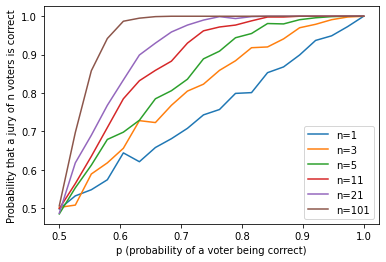

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Define the range of values for p
p_values = list(np.linspace(0.5, 1, 20)) # divide to 20 intervals in range [0.5,1]
# Define the number of voters (n)
n = [1,3,5,11,21,101]
# For each value of p, perform Monte Carlo simulations to estimate the probability that a jury of n voters is correct
for voters in n:
  probabilities = []
  for p in p_values:
    # Initialize a counter to store the number of times the majority of the voters is correct
    correct = 0
    # Perform 1000 Monte Carlo simulations
    for i in range(1000):
      # Generate a sample of n voters, where each voter is correct with probability p and incorrect with probability 1-p
      sample = [random.random() < p for j in range(voters)]
      # Determine whether the majority of the voters in the sample are correct or incorrect
      if sum(sample) > voters // 2:
          correct += 1
    # Calculate the average probability that the majority of the voters in the sample are correct, based on the samples generated
    probabilities.append(correct / 1000)
  plt.plot(p_values, probabilities, label= f"n={voters}")

# Plot the probability that a jury of n voters is correct as a function of p
plt.xlabel('p (probability of a voter being correct)')
plt.ylabel('Probability that a jury of n voters is correct')
plt.legend()
plt.show()

The law of large numbers states that, as the number of independent and identically distributed random variables increases, the average of these variables approaches the expected value. In other words, as the sample size increases, the sample mean becomes increasingly close to the population mean.

In the context of a jury, where each voter has a probability $p$ of being correct, the expected value of the fraction of correct voters in the jury is $p$. Therefore, as the number of jurors $n$ increases, the average fraction of correct voters in the jury (i.e., the sample mean) becomes increasingly close to $p$.

If $p > 0.5$, then the expected value of the fraction of correct voters is greater than 0.5. Therefore, as $n$ increases, the average fraction of correct voters in the jury becomes increasingly close to 0.5, and the probability that the majority of the jurors are correct becomes increasingly close to 1.

To prove this formally, we can use the following argument:

Let $X_1, X_2, ..., X_n$ be the random variables representing the votes of the jurors, where $X_i = 1$ if juror $i$ is correct and $X_i = 0$ if juror $i$ is incorrect.

The fraction of correct jurors is given by $\frac{\sum_{i=1}^n X_i}{n}$.

By the law of large numbers, as $n \to \infty$, the sample mean $\frac{\sum_{i=1}^n X_i}{n}$ approaches the expected value $E[X] = p$.

If $p > 0.5$, then $E[X] > 0.5$. Therefore, as $n \to \infty$, the sample mean $\frac{\sum_{i=1}^n X_i}{n}$ becomes increasingly close to 0.5.

If the sample mean $\frac{\sum_{i=1}^n X_i}{n}$ is greater than or equal to 0.5, then the majority of the jurors are correct.

Therefore, as $n \to \infty$, the probability that the majority of the jurors are correct becomes increasingly close to 1.

# II. AdaBoost (35 points)
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-5,loss='hinge', C=1e5, max_iter=1e6*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note:** 
 * Explain you results in text and support it with figures.

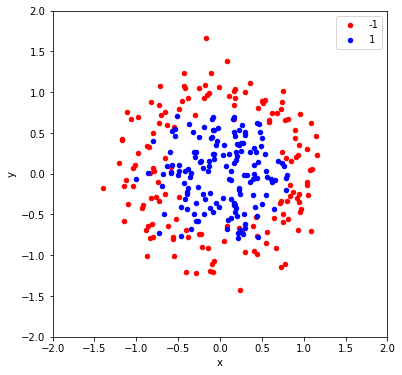

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 70% training and 30% test
svc = LinearSVC(tol=1e-5, loss='hinge', C=1e5, max_iter=1e6)
# Create adaboost classifer object
estimators = [1,3,10,50,100,1000,10000]
for i in range(len(estimators)):
  fig, ax = plt.subplots()
  AdaBoost_svc = AdaBoostClassifier(svc, n_estimators=estimators[i], algorithm="SAMME")
  # clf = make_pipeline(AdaBoost_svc, LinearSVC(random_state=0, tol=1e-5))
  # Train Adaboost Classifer
  model = AdaBoost_svc.fit(X_train, y_train)
  #Predict the response for test dataset
  y_pred = model.predict(X_test)
  plot_data(X_train, y_train, model.predict, ax)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

1. While n is grower the accuracy get closer to 1 value, and in some point the accuracy score converges.
2. We can see the model start to overfit, the visualition helps us to detect it. In the last iterations while using big number of estimators we can see how the model trying to avoid mistakes by trying to isolate the blue point from the red points.
3. The optimal number of estimators is 10. We can see the sum of errors sill low and we can see the accuarcy get converges. 

---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (50 pts + 10 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten additional points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/3c2cb35d174c287b7fcaf1c716f523ef





### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions. 

***Write your code below***


In [420]:
# Implement here
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


x_test = pd.read_csv("/content/x_test.csv")
y_test = pd.read_csv("/content/sub.csv")

x_train = pd.read_csv("/content/x_train.csv")
y_train = pd.read_csv("/content/y_train.csv")
x_train


,id,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,...,miRNAPairingCount_Total_target_bulge,miRNAPairingCount_X3p_AU,miRNAPairingCount_X3p_GC,miRNAPairingCount_X3p_GU,miRNAPairingCount_X3p_bulge_mir_nt,miRNAPairingCount_X3p_bulge_nt,miRNAPairingCount_X3p_bulge_target_nt,miRNAPairingCount_X3p_mir_bulge,miRNAPairingCount_X3p_mismatch,miRNAPairingCount_X3p_target_bulge
0,0,0.009997,0.286680,0.071469,0.030892,0.028100,0.027835,NaN,0.020861,0.011003,...,0.0,4.0,3.0,1.0,3.0,3.0,0.0,2.0,NaN,0.0
1,1,0.256987,0.263582,0.255437,0.246667,0.247228,0.249358,0.248635,0.249442,0.250728,...,NaN,3.0,3.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
2,2,0.318176,NaN,0.973395,NaN,NaN,0.337735,NaN,0.316446,NaN,...,1.0,0.0,0.0,1.0,10.0,10.0,0.0,NaN,3.0,1.0
3,3,NaN,0.687934,NaN,0.688786,NaN,NaN,0.692787,0.690106,0.670033,...,0.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,2.0,0.0
4,4,NaN,NaN,0.956451,0.938652,0.929122,NaN,NaN,0.032907,0.016511,...,NaN,1.0,3.0,1.0,0.0,0.0,NaN,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9050,9050,NaN,NaN,NaN,NaN,NaN,0.314714,NaN,0.315729,NaN,...,1.0,4.0,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0
9051,9051,0.025510,0.435731,0.341024,NaN,0.296954,0.286663,0.251402,0.063612,0.033706,...,0.0,5.0,NaN,NaN,0.0,NaN,0.0,NaN,3.0,NaN
9052,9052,NaN,0.440632,0.410593,0.387290,NaN,0.040106,0.026283,NaN,0.020456,...,NaN,5.0,6.0,1.0,NaN,NaN,0.0,1.0,2.0,0.0
9053,9053,0.085230,0.871697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,2.0,1.0,2.0,1.0,NaN,NaN,2.0


In [421]:
pd.DataFrame(x_train.mean(numeric_only=True))

,0
id,4527.000000
Acc_P10_10th,0.135254
Acc_P10_1th,0.597007
Acc_P10_2th,0.481969
Acc_P10_3th,0.397697
...,...
miRNAPairingCount_X3p_bulge_nt,3.526357
miRNAPairingCount_X3p_bulge_target_nt,2.370973
miRNAPairingCount_X3p_mir_bulge,0.529281
miRNAPairingCount_X3p_mismatch,4.289403


In [422]:
# count for each label
y_train["label"].value_counts()

2.0    3361
4.0    1319
1.0    1210
3.0     266
5.0     207
Name: label, dtype: int64

In [423]:
x_train.describe()

,id,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,...,miRNAPairingCount_Total_target_bulge,miRNAPairingCount_X3p_AU,miRNAPairingCount_X3p_GC,miRNAPairingCount_X3p_GU,miRNAPairingCount_X3p_bulge_mir_nt,miRNAPairingCount_X3p_bulge_nt,miRNAPairingCount_X3p_bulge_target_nt,miRNAPairingCount_X3p_mir_bulge,miRNAPairingCount_X3p_mismatch,miRNAPairingCount_X3p_target_bulge
count,9055.000000,6.319000e+03,6319.000000,6344.000000,6320.000000,6344.000000,6390.000000,6.336000e+03,6.309000e+03,6.293000e+03,...,6406.000000,6306.000000,6325.000000,6393.000000,6292.000000,6336.000000,6332.000000,6301.000000,6351.000000,6373.000000
mean,4527.000000,1.352541e-01,0.597007,0.481969,0.397697,0.328774,0.273044,2.332613e-01,1.981153e-01,1.760452e-01,...,1.194505,3.736283,4.150040,1.206789,1.147171,3.526357,2.370973,0.529281,4.289403,1.022595
std,2614.097677,2.006150e-01,0.297913,0.302151,0.293714,0.277694,0.262293,2.483091e-01,2.347001e-01,2.260636e-01,...,1.001610,1.782746,1.772685,1.153885,1.877242,4.486542,4.466757,0.650012,2.724750,0.900299
min,0.000000,8.070000e-11,0.000291,0.000084,0.000011,0.000009,0.000003,5.920000e-07,5.000000e-09,5.040000e-10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2263.500000,9.537076e-03,0.340924,0.209290,0.141380,0.093251,0.064512,4.337318e-02,2.920361e-02,2.152900e-02,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,4527.000000,4.782703e-02,0.632522,0.451097,0.333179,0.250731,0.177781,1.377855e-01,1.016490e-01,7.900122e-02,...,1.000000,4.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000
75%,6790.500000,1.656702e-01,0.880755,0.752339,0.631329,0.512383,0.415355,3.444897e-01,2.826754e-01,2.403039e-01,...,2.000000,5.000000,5.000000,2.000000,2.000000,4.000000,3.000000,1.000000,6.000000,2.000000
max,9054.000000,9.998509e-01,0.999969,0.999724,0.999908,0.999851,0.999812,9.998352e-01,9.998392e-01,9.996446e-01,...,6.000000,10.000000,10.000000,7.000000,15.000000,40.000000,40.000000,3.000000,16.000000,5.000000


In [424]:
# correlation between columns
df_corr = pd.DataFrame(x_train.corr().unstack().sort_values(ascending=False))
df_corr[df_corr[0] < 1]

,,0
Energy_MEF_cons_local_target,Energy_MEF_cons_local_target_normalized,0.988841
Energy_MEF_cons_local_target_normalized,Energy_MEF_cons_local_target,0.988841
Energy_MEF_local_target,Energy_MEF_local_target_normalized,0.982572
Energy_MEF_local_target_normalized,Energy_MEF_local_target,0.982572
miRNAPairingCount_Seed_bulge_nt,miRNAPairingCount_Seed_bulge_target_nt,0.980271
...,...,...
Seed_match_interactions_2_7,miRNAPairingCount_Seed_mismatch,-0.944029
Seed_match_interactions_all,miRNAPairingCount_Seed_mismatch,-0.978581
miRNAPairingCount_Seed_mismatch,Seed_match_interactions_all,-0.978581
MRNA_Dist_to_end,MRNA_Dist_to_start,-0.994425


In [425]:
# Implement here
# count nulls in each column 
pd.DataFrame(x_train.isnull().sum())

,0
id,0
Acc_P10_10th,2736
Acc_P10_1th,2736
Acc_P10_2th,2711
Acc_P10_3th,2735
...,...
miRNAPairingCount_X3p_bulge_nt,2719
miRNAPairingCount_X3p_bulge_target_nt,2723
miRNAPairingCount_X3p_mir_bulge,2754
miRNAPairingCount_X3p_mismatch,2704


In [426]:
# get cols with more then 80 precent nulls
columns = x_train.columns
percent_missing = x_train.isnull().sum() * 100 / len(x_train)
missing_value_df = pd.DataFrame({'column_name': columns, 'percent_missing': percent_missing})

missing_drop = list(missing_value_df[missing_value_df.percent_missing>80].column_name)
print(f"{len(missing_drop)} columns with more then 80% null values: ")

0 columns with more then 80% null values: 


In [427]:
# Explain here
# Explain in the text below

As we can see from a high level of the data, the data is **imbalacned**. The count of labels are not even or close to it. There are many **columns with high correlation**, that are not neccessery like 'Energy_MEF_cons_local_target_normalized' and 'Energy_MEF_cons_local_target'.
Also the data **contains many nulls** in each column.


### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it. 

***Write your code below***

In [428]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(0.98 < upper[column])]
to_keep = [column for column in to_drop if any(upper[column] >= 1.0)]
to_drop = [column for column in to_drop if column not in to_keep]


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [429]:
to_drop

['Energy_MEF_cons_local_target_normalized',
 'Energy_MEF_local_target_normalized',
 'MRNA_Dist_to_start',
 'miRNAPairingCount_Seed_bulge_target_nt']

In [430]:
# Drop features 
x_train.drop(to_drop, axis=1, inplace=True)
x_test.drop(to_drop, axis=1, inplace=True)

In [431]:
full_train = x_train
full_train["label"] = y_train["label"]
grouped = full_train.groupby('label')
full_train_group = grouped.agg(lambda x: pd.Series.mode(x)[0])
for i in range(full_train.shape[0]):
  if pd.isnull(full_train['label'].iloc[i]):
    continue
  label = full_train['label'].iloc[i]
  for col in full_train.columns:
    if pd.isnull(full_train.iloc[i][col]):
      full_train.at[i,col] = full_train_group[col].loc[label]
x_train = full_train.drop(columns=['label'])

In [432]:
# x_train = pd.read_csv("/content/initial_sub.csv")


In [433]:
x_test_id = x_test["id"]

In [434]:
# remove x and y rows that without label
indices_to_drop = y_train[y_train['label'].isna()].index.tolist()

# df with null labels
X_train_with_null = x_train.loc[indices_to_drop]
Y_train_with_null = y_train.loc[indices_to_drop]

# # df without null label
X_train = x_train.drop(indices_to_drop)
Y_train = y_train.drop(indices_to_drop)

X_train = X_train.drop(columns= ['id'])
X_train_with_null = X_train_with_null.drop(columns= ['id'])
x_test = x_test.drop(columns=['id'])


In [435]:
# change categorial features to integers
cat_feature = list(set(X_train.columns) - set(X_train._get_numeric_data().columns))
X_train = pd.get_dummies(X_train, columns=cat_feature)
x_test = pd.get_dummies(x_test, columns=cat_feature)
X_train_with_null = pd.get_dummies(X_train_with_null, columns=cat_feature)

In [436]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)
X_train = pd.DataFrame(x_train_scaled, index=X_train.index, columns=X_train.columns)
x_test = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)


In [437]:
# check for duplicates
duplicate_rows = sum([1 for i in X_train.duplicated().tolist() if i])
print(f"{duplicate_rows} duplicate rows")

0 duplicate rows


In [438]:
# Remove outliers that 3 standard deviations away from the mean
for col in X_train.columns:  
  mean = X_train[col].mean()
  sd = X_train[col].std()
  outliers_index = X_train.index[(X_train[col] > mean+(3*sd))].tolist()
print("outliers_index to remove: ", outliers_index)

X_train = X_train.drop(outliers_index)
Y_train = Y_train.drop(outliers_index)

outliers_index to remove:  []


In [439]:
X_train

,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,Acc_P10_9th,...,miRNAMatchPosition_10_GC,miRNAMatchPosition_10_GU,miRNAMatchPosition_10_MM,Seed_match_noncanonical_False,Seed_match_noncanonical_True,miRNAMatchPosition_15_AU,miRNAMatchPosition_15_BB,miRNAMatchPosition_15_GC,miRNAMatchPosition_15_GU,miRNAMatchPosition_15_MM
0,0.009999,0.285503,0.071410,0.030832,0.028054,0.027837,0.064019,0.020865,0.011007,0.010350,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.257025,0.262365,0.255445,0.246640,0.247227,0.249402,0.248675,0.249482,0.250817,0.255825,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.318223,0.994548,0.973662,0.988071,0.388565,0.337797,0.341521,0.316497,0.312423,0.319415,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.000001,0.009632,0.956711,0.938735,0.929258,0.000238,0.000039,0.032912,0.016516,0.002590,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.037088,0.155625,0.140551,0.988071,0.045442,0.038596,0.038820,0.038789,0.038794,0.038836,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9050,0.963506,0.245309,0.232664,0.226671,0.978734,0.314771,0.064019,0.315780,0.000001,0.027938,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9051,0.025514,0.434811,0.341063,0.000961,0.296962,0.286715,0.251443,0.063622,0.033717,0.000007,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9052,0.963506,0.439720,0.410657,0.387286,0.978734,0.040111,0.026287,0.971609,0.020463,0.019174,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9053,0.085243,0.871529,0.843055,0.000277,0.165489,0.792846,0.193539,0.177514,0.000088,0.105178,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [440]:
x_test

,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,Acc_P10_9th,...,miRNAMatchPosition_10_GC,miRNAMatchPosition_10_GU,miRNAMatchPosition_10_MM,Seed_match_noncanonical_False,Seed_match_noncanonical_True,miRNAMatchPosition_15_AU,miRNAMatchPosition_15_BB,miRNAMatchPosition_15_GC,miRNAMatchPosition_15_GU,miRNAMatchPosition_15_MM
0,0.009067,0.892347,NaN,0.829374,0.653042,NaN,NaN,NaN,0.136353,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.097649,0.668242,0.656769,NaN,0.622942,0.486054,NaN,0.198698,0.130659,0.105704,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.022667,0.639196,NaN,0.094661,0.075772,0.072159,NaN,0.029660,0.023828,0.023050,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.027677,0.894654,0.817304,0.815685,NaN,NaN,0.089402,0.043529,NaN,0.030309,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.163776,0.338534,0.334032,0.320502,0.260976,0.201683,0.194443,0.188229,NaN,0.172837,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23200,NaN,NaN,0.109197,NaN,NaN,0.051714,0.042997,0.035412,NaN,0.011868,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
23201,0.067276,NaN,NaN,0.128975,0.126464,NaN,NaN,0.078818,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
23202,NaN,NaN,0.495058,NaN,0.136154,0.021833,0.016399,NaN,0.006564,0.004555,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
23203,0.000332,NaN,0.296638,NaN,0.164820,0.109542,0.109243,0.011978,NaN,0.000630,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


1. Check sum of nulls in each column and remove if necessery.
2. Check Correlation between columns.
3. Fill missing values to x train data, fill with the value that appears most often in each label.
4. Change categorial features to integers.
5. Delete row with null label.
6. Scale the data.
7. Check for duplicates rows.
8. Remove outliers that 3 standard deviations away from the mean if necessery.

### Model training (10 pts):
Train your ML model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [441]:
# kaggle part
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate= 0.5, max_depth=4, n_estimators= 100)
# fit on update data
clf = model.fit(X_train, Y_train['label'])
y_predict_ = clf.predict(x_test)

In [442]:
y_pred = [int(i) for i in y_predict_]
solution = pd.DataFrame()
solution['id'] = pd.DataFrame(x_test_id,columns= ['id']).astype(int).astype(str)
solution['label'] = y_pred
solution.to_csv("real_sub.csv",index=False)

In [443]:
from google.colab import files
# files.download('real_sub.csv')

In [444]:
# not kaggle part
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_train, Y_train['label'], test_size=0.33, random_state=42)

model = xgb.XGBClassifier(n_estimators= 100, learning_rate= 0.5, max_depth= 4)

# fit on update data
fitted = model.fit(X_train, y_train)
y_predict = fitted.predict(X_test)
train_accuracy = accuracy_score(y_test, y_predict)

print(f"train accuracy: {train_accuracy}")

train accuracy: 1.0


In [445]:
# Explain here
# 1. split the data to train and test
# 2. Create a Ensemble model with parameters after cv.
# 3. Fit the model to train data 
# 4. Predict the y test values.

### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [446]:
import sklearn.metrics
# List of evaluation metrics
# Accuracy -
train_accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {train_accuracy}")
# Balanced Accuracy -
train_B_accuracy = sklearn.metrics.balanced_accuracy_score(y_test, y_predict)
print(f"Balanced Accuracy: {train_B_accuracy}")
# Micro Precision -
train_Micro_Precision = sklearn.metrics.precision_score(y_test, y_predict, average='micro')
print(f"Micro Precision: {train_Micro_Precision}")
# Micro Recall -
train_Micro_Recall = sklearn.metrics.recall_score(y_test, y_predict, average='micro')
print(f"Micro Recall: {train_Micro_Recall}")
# Micro F1-score -
train_Micro_F1 = sklearn.metrics.f1_score(y_test, y_predict, average='micro')
print(f"Micro F1 Score: {train_Micro_F1}")
# Macro Precision -
train_macro_Precision = sklearn.metrics.precision_score(y_test, y_predict, average='macro')
print(f"Macro Precision: {train_macro_Precision}")
# Macro Recall -
train_Macro_Recall = sklearn.metrics.recall_score(y_test, y_predict, average='macro')
print(f"Macro Recall: {train_Macro_Recall}")
# Macro F1-score -
train_Macro_F1 = sklearn.metrics.f1_score(y_test, y_predict, average='macro')
print(f"Macro F1 Score: {train_Macro_F1}")
# Weighted Precision -
train_Weighted_Precision = sklearn.metrics.precision_score(y_test, y_predict, average='weighted')
print(f"Weighted Precision: {train_Weighted_Precision}")
# Weighted Recall -
train_Weighted_Recall = sklearn.metrics.recall_score(y_test, y_predict, average='weighted')
print(f"Weighted Recall: {train_Weighted_Recall}")
# Weighted F1-score -
train_weighted_F1 = sklearn.metrics.f1_score(y_test, y_predict, average='weighted')
print(f"Weighted F1 Score: {train_weighted_F1}")

Accuracy: 1.0
Balanced Accuracy: 1.0
Micro Precision: 1.0
Micro Recall: 1.0
Micro F1 Score: 1.0
Macro Precision: 1.0
Macro Recall: 1.0
Macro F1 Score: 1.0
Weighted Precision: 1.0
Weighted Recall: 1.0
Weighted F1 Score: 1.0


All the metrics that relevant to this prediction task are metrics that dealing with imbalanced datasets, as we can see in the EDA part, the data is imbalanced label.<br />
**Accuracy:** The proportion of correct predictions made by the model, out of all the predictions made. <br />
**Balanced Accuracy:** Calculate the classes in the data are imbalanced, meaning that there is a significant difference in the number of samples belonging to each class.<br />
**Micro precision:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the precision metric, which is a measure of the proportion of positive predictions that are actually correct.<br />
**Micro Recall:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the recall metric, which is a measure of the proportion of actual positive instances that are correctly predicted by the model.<br />
**Micro F1 Score:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the F1 score, which is a measure of the balance between precision and recall. <br />
**Macro Precision:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the precision metric, which is a measure of the proportion of positive predictions that are actually correct.<br />
**Macro Recall:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the recall metric, which is a measure of the proportion of actual positive instances that are correctly predicted by the model.<br />
**Macro F1 Score:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the F1 score, which is a measure of the balance between precision and recall.<br />
**Weighted Precision:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the precision metric, which is a measure of the proportion of positive predictions that are actually correct.<br />
**Weighted Recall:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the recall metric, which is a measure of the proportion of actual positive instances that are correctly predicted by the model.<br />
**Weighted F1 Score:** Is a metric that is used to evaluate the performance of a classification model when dealing with imbalanced datasets. It is a variant of the F1 score, which is a measure of the balance between precision and recall.


















### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

In [ ]:
# !pip install shap


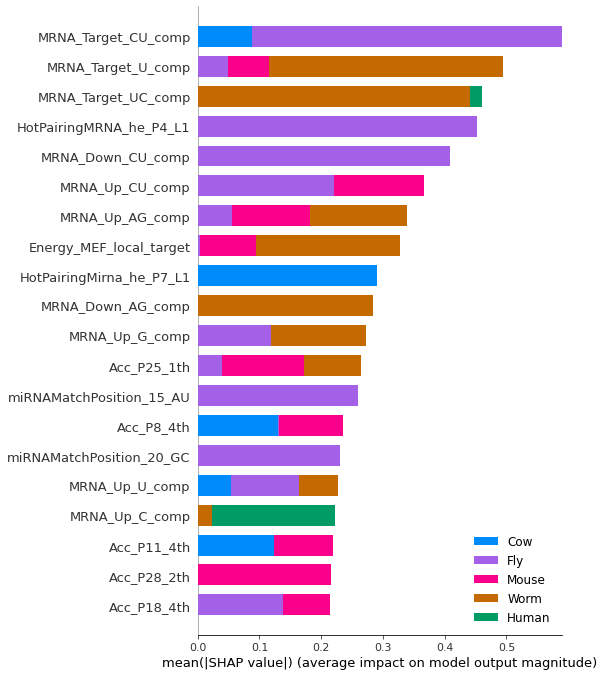

In [451]:
# Implement here
# compute SHAP values
import shap
# Fly (label 1)
# Cow (label 2)
# Human (label 3)
# Mouse (label 4)
# Worm (label 5)

class_names = ['Fly', 'Cow', 'Human', 'Mouse','Worm']
explainer = shap.TreeExplainer(fitted)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train.values, plot_type="bar", class_names= class_names, feature_names = X_train.columns)


In [449]:
# Explain here
'''
From this we can se the which column as more impact on each predict,
means that we can see that if we predict data set without Worm miRNA, 
we dont need to calculate in our predict the 'MRNA_Down_AG_comp' for prediction.
'''

### Competition rank (10 pts):
The competition will end on 29.12 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [450]:
# My team name was: Roy Paz